# **Advanced Lane Detection**

In [1]:
%matplotlib inline
import cv2
import glob
import matplotlib.pyplot as plt
from os import path
from pipeline.calibration import calibrate_camera, find_chessboard_corners, read_images, undistort_chessboard_imgs, undistort_imgs

## Calibrate camera using chessboard images

In [2]:
chessboard_dir = './camera_cal'

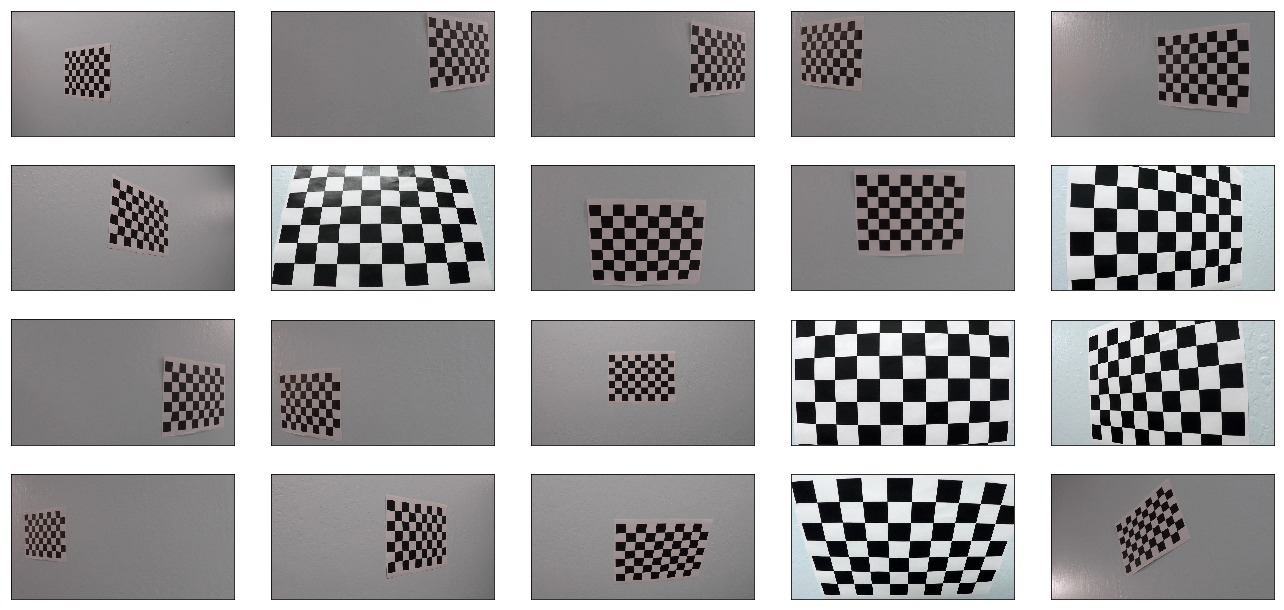

In [3]:
chessboard_imgs = read_images(chessboard_dir, color_imgs=True)
plt.figure(figsize=(18,9))
for i, img in enumerate(chessboard_imgs, start=1):
    plt.subplot(4,5,i)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.imshow(img)

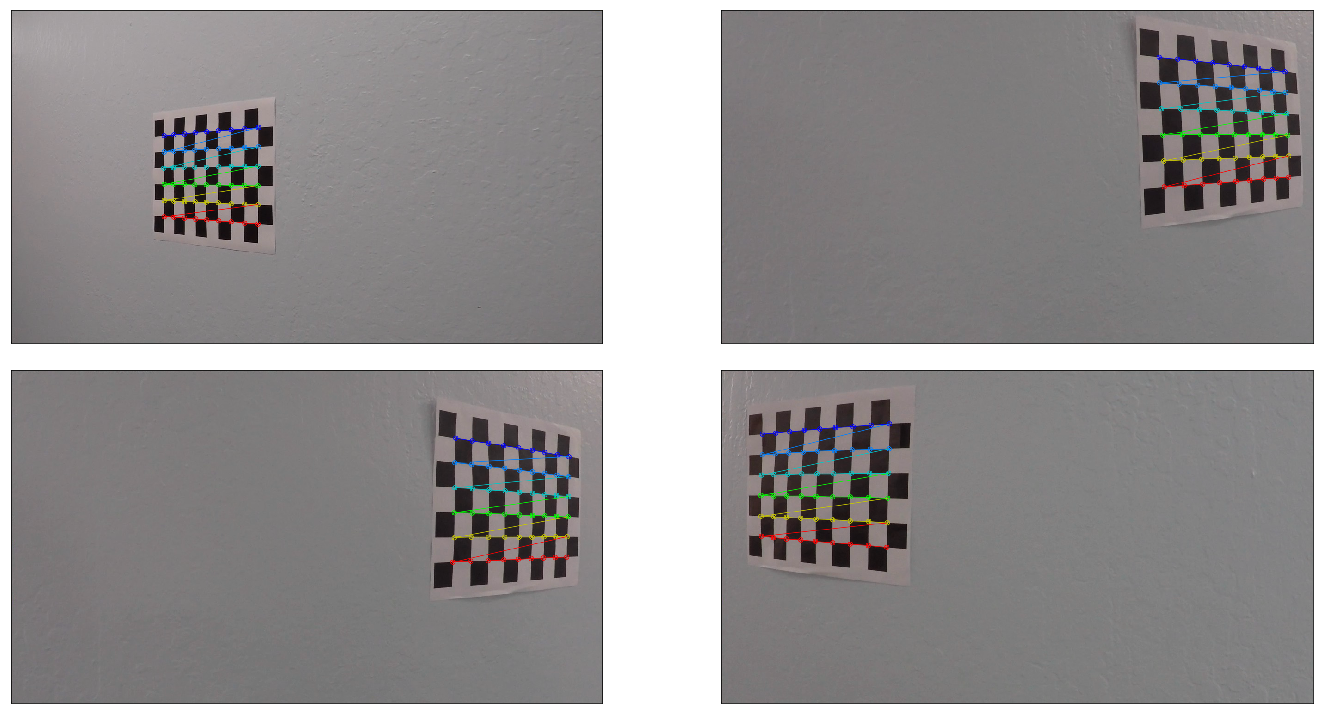

In [4]:
chessboard_size = (9,6)
used_img_indices, obj_points, img_points, grayscale_imgs = find_chessboard_corners(chessboard_dir,
                                                                                   data_for_drawing=True)
plt.figure(figsize=(20,20))
for i in range(len(img_points)):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    cv2.drawChessboardCorners(chessboard_imgs[used_img_indices[i]], chessboard_size, img_points[i], True)
    plt.imshow(chessboard_imgs[used_img_indices[i]])
    if i == 3:
        break

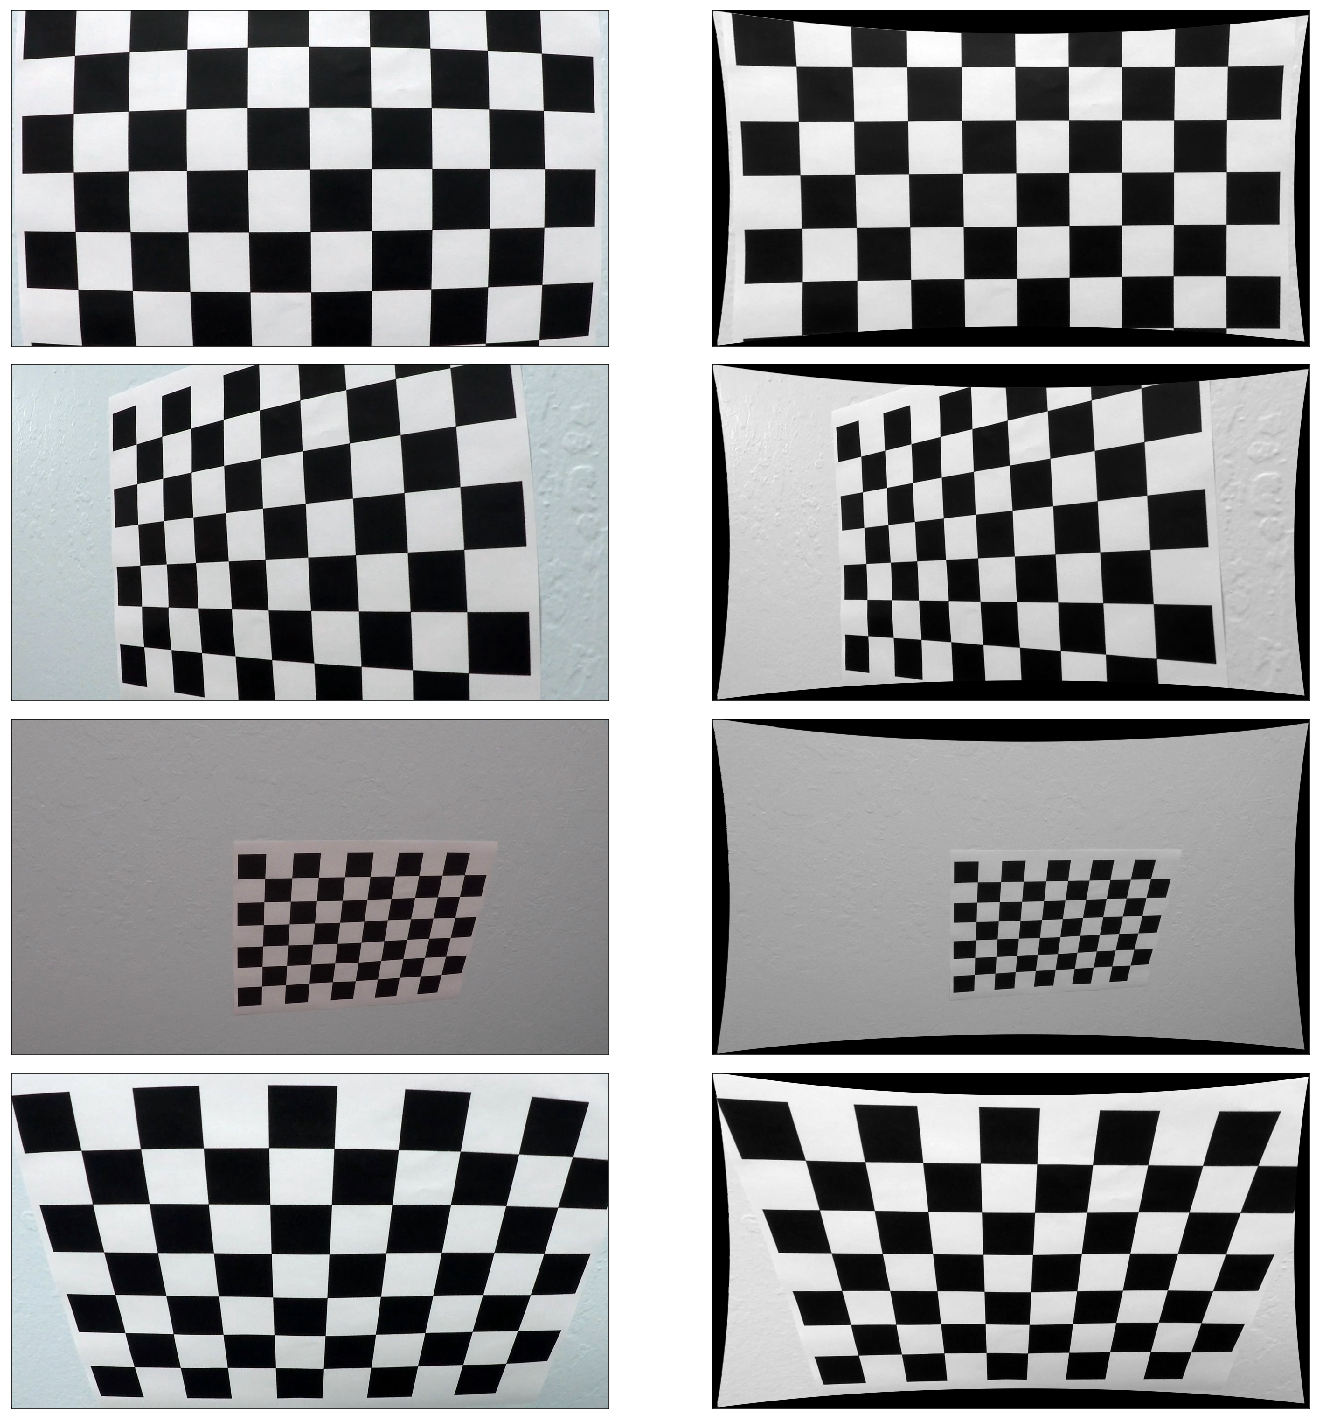

In [5]:
results = undistort_chessboard_imgs(chessboard_dir, grayscale_imgs[1].shape[::-1])
interesting_distortions = [13, 14, 17, 18]
plt.figure(figsize=(20,20))
i = 1
for index in interesting_distortions:
    plt.subplot(4, 2, i)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.imshow(chessboard_imgs[index], cmap='gray')
    
    i += 1
    plt.subplot(4, 2, i)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.imshow(results[index], cmap='gray')
    i += 1

## Apply transformations to road imagery samples

In [6]:
sample_road_imgs_dir = './test_images'
sample_road_imgs = read_images(sample_road_imgs_dir, color_imgs=True, color_mode='RGB')

In [7]:
chessboard_img_shape = chessboard_imgs[1].shape[1::-1]
_, matrix, dist, _, _ = calibrate_camera(chessboard_dir, chessboard_img_shape)
new_matrix, roi = cv2.getOptimalNewCameraMatrix(matrix, dist, chessboard_img_shape,
                                                1, chessboard_img_shape)
calibration_dict = {'matrix': matrix,
                    'dist': dist,
                    'new_matrix': new_matrix}

In [8]:
undistorted_road_imgs = undistort_imgs(calibration_dict, sample_road_imgs_dir)

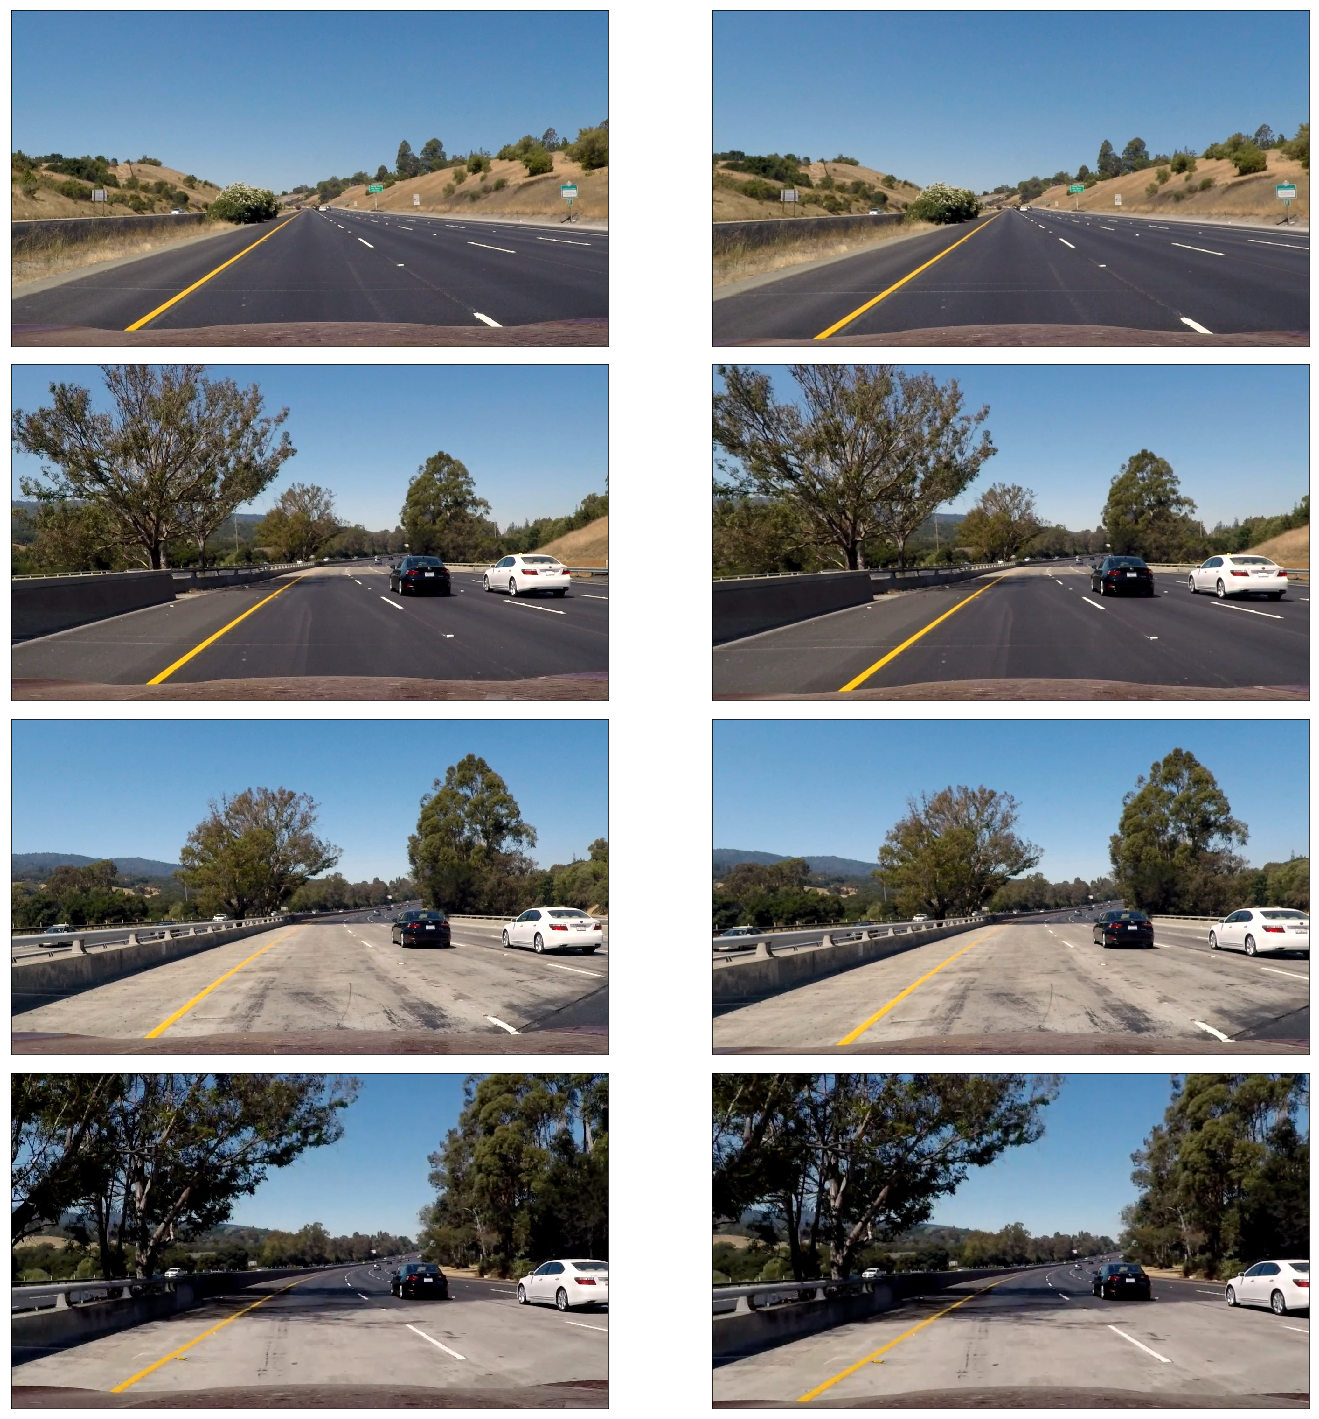

In [9]:
plt.figure(figsize=(20,20))
i = 1
for index, sample_road_img in enumerate(sample_road_imgs):
    plt.subplot(4, 2, i)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.imshow(cv2.cvtColor(sample_road_img, cv2.COLOR_BGR2RGB))
    
    i += 1
    plt.subplot(4, 2, i)
    plt.tight_layout()
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.imshow(cv2.cvtColor(undistorted_road_imgs[index], cv2.COLOR_BGR2RGB))
    i += 1
    if i == 9:
        break